In [74]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()

plt.rcParams['savefig.dpi'] = 150 #图片像素
plt.rcParams['figure.dpi'] = 150 #分辨率
# 默认的像素：[6.0,4.0]，分辨率为100，图片尺寸为 60
%matplotlib notebook


In [75]:
# tesla = pd.read_csv('TSLA.csv')
tesla = pd.read_csv('../Dataset/11_28.csv', parse_dates=['Date'])

tesla['Date'] = pd.to_datetime(tesla['Date'])
tesla.head()

Date   Open   High    Low  Close  Adj Close      Volume  OilPrice  \
0 2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500.0     74.94   
1 2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000.0     71.73   
2 2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000.0     71.75   
3 2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500.0     73.08   
4 2010-07-07  3.280  3.326  2.996  3.160      3.160  34608500.0     72.97   

   deaths  DPRIME   TOTALSA  
0     0.0    3.25  0.386600  
1     0.0    3.25  0.398267  
2     0.0    3.25  0.398267  
3     0.0    3.25  0.398267  
4     0.0    3.25  0.398267

In [76]:
def df_shift(df,lag=0, start=1, skip=1, rejected_columns = []):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(start,lag+1,skip):
        for x in list(df.columns):
            if x not in rejected_columns:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = (skip - 1)
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=skip
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
    return df

In [77]:
tesla = tesla[['Date','Close']]
tesla.head(1)

Date  Close
0 2010-06-30  4.766

In [78]:
df_crosscorrelated = df_shift(tesla, lag = 15, start = 1, skip = 2,rejected_columns=['Date'])

# df_crosscorrelated.head(10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.


<IPython.core.display.Javascript object>


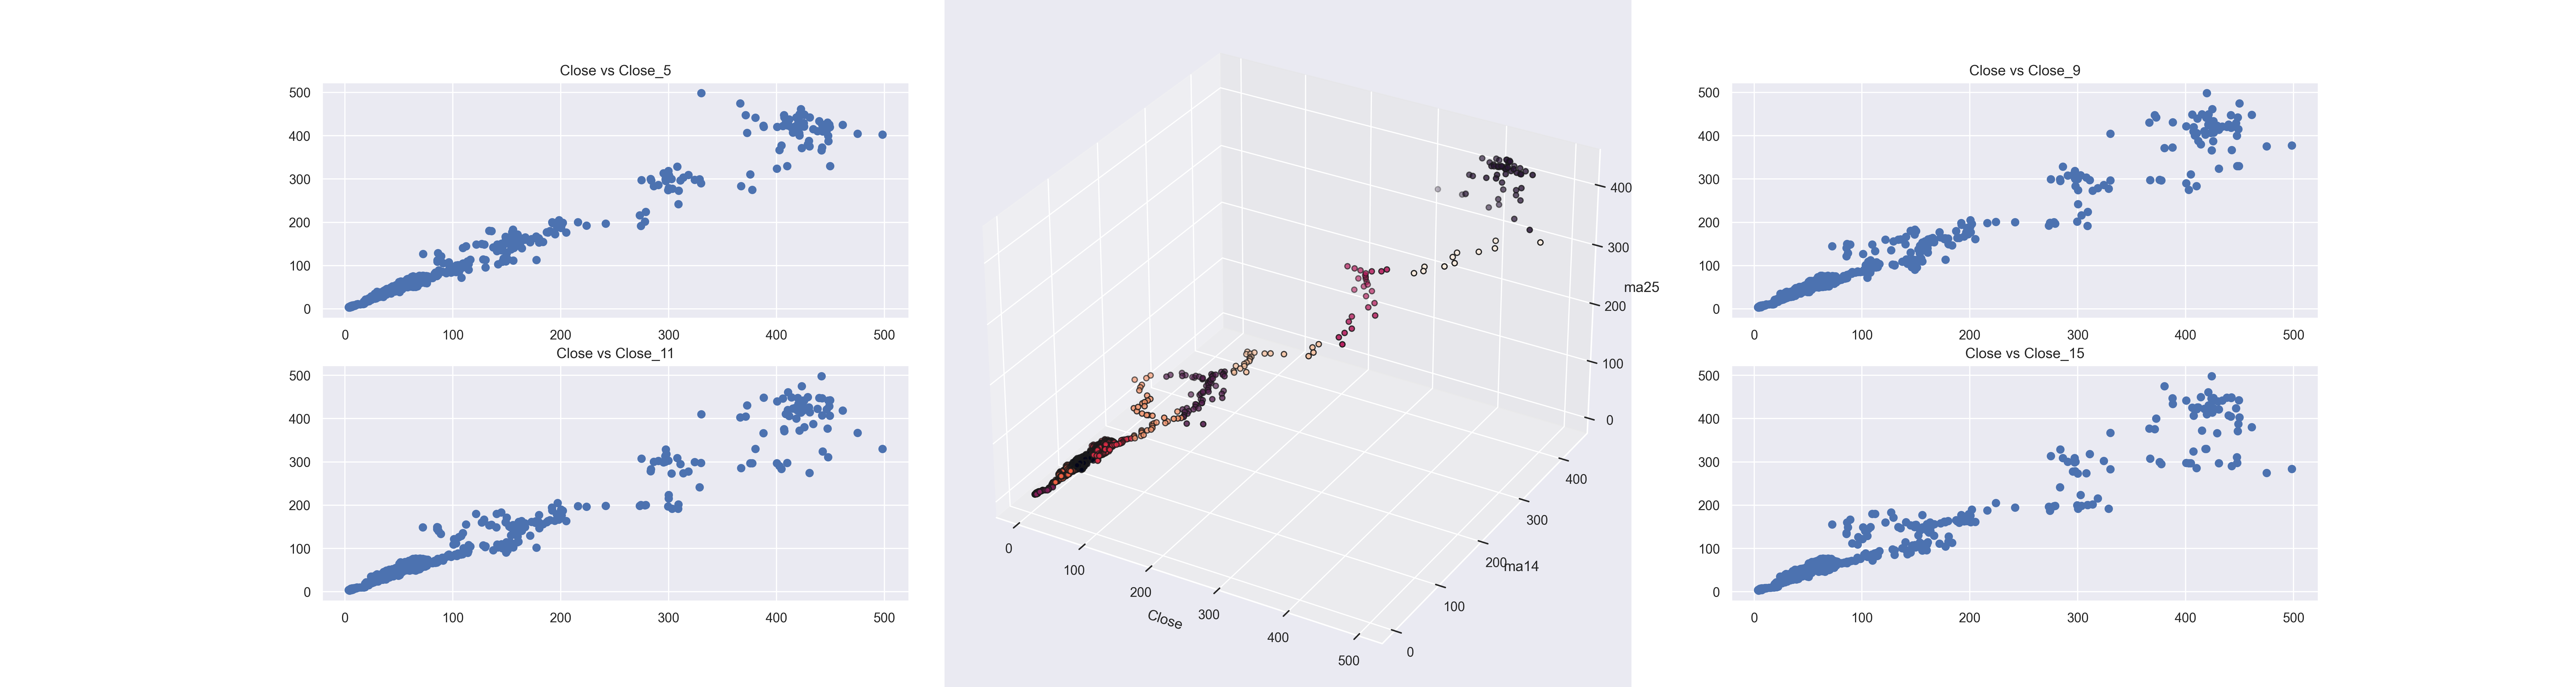

In [79]:
plt.figure(figsize=(30, 8))
# plt.subplot(1,3,1)
# plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_1'])
# plt.title('Close vs Close_1')
plt.subplot(2,3,1)
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_5'])
plt.title('Close vs Close_5')
plt.subplot(2,3,2)
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_7'])
plt.title('Close vs Close_7')
plt.subplot(2,3,3)
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_9'])
plt.title('Close vs Close_9')
plt.subplot(2,3,4)
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_11'])
plt.title('Close vs Close_11')
plt.subplot(2,3,5)
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_13'])
plt.title('Close vs Close_13')
plt.subplot(2,3,6)

plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_15'])
plt.title('Close vs Close_15')
plt.show()
plt.savefig(fname="x.png")

<IPython.core.display.Javascript object>


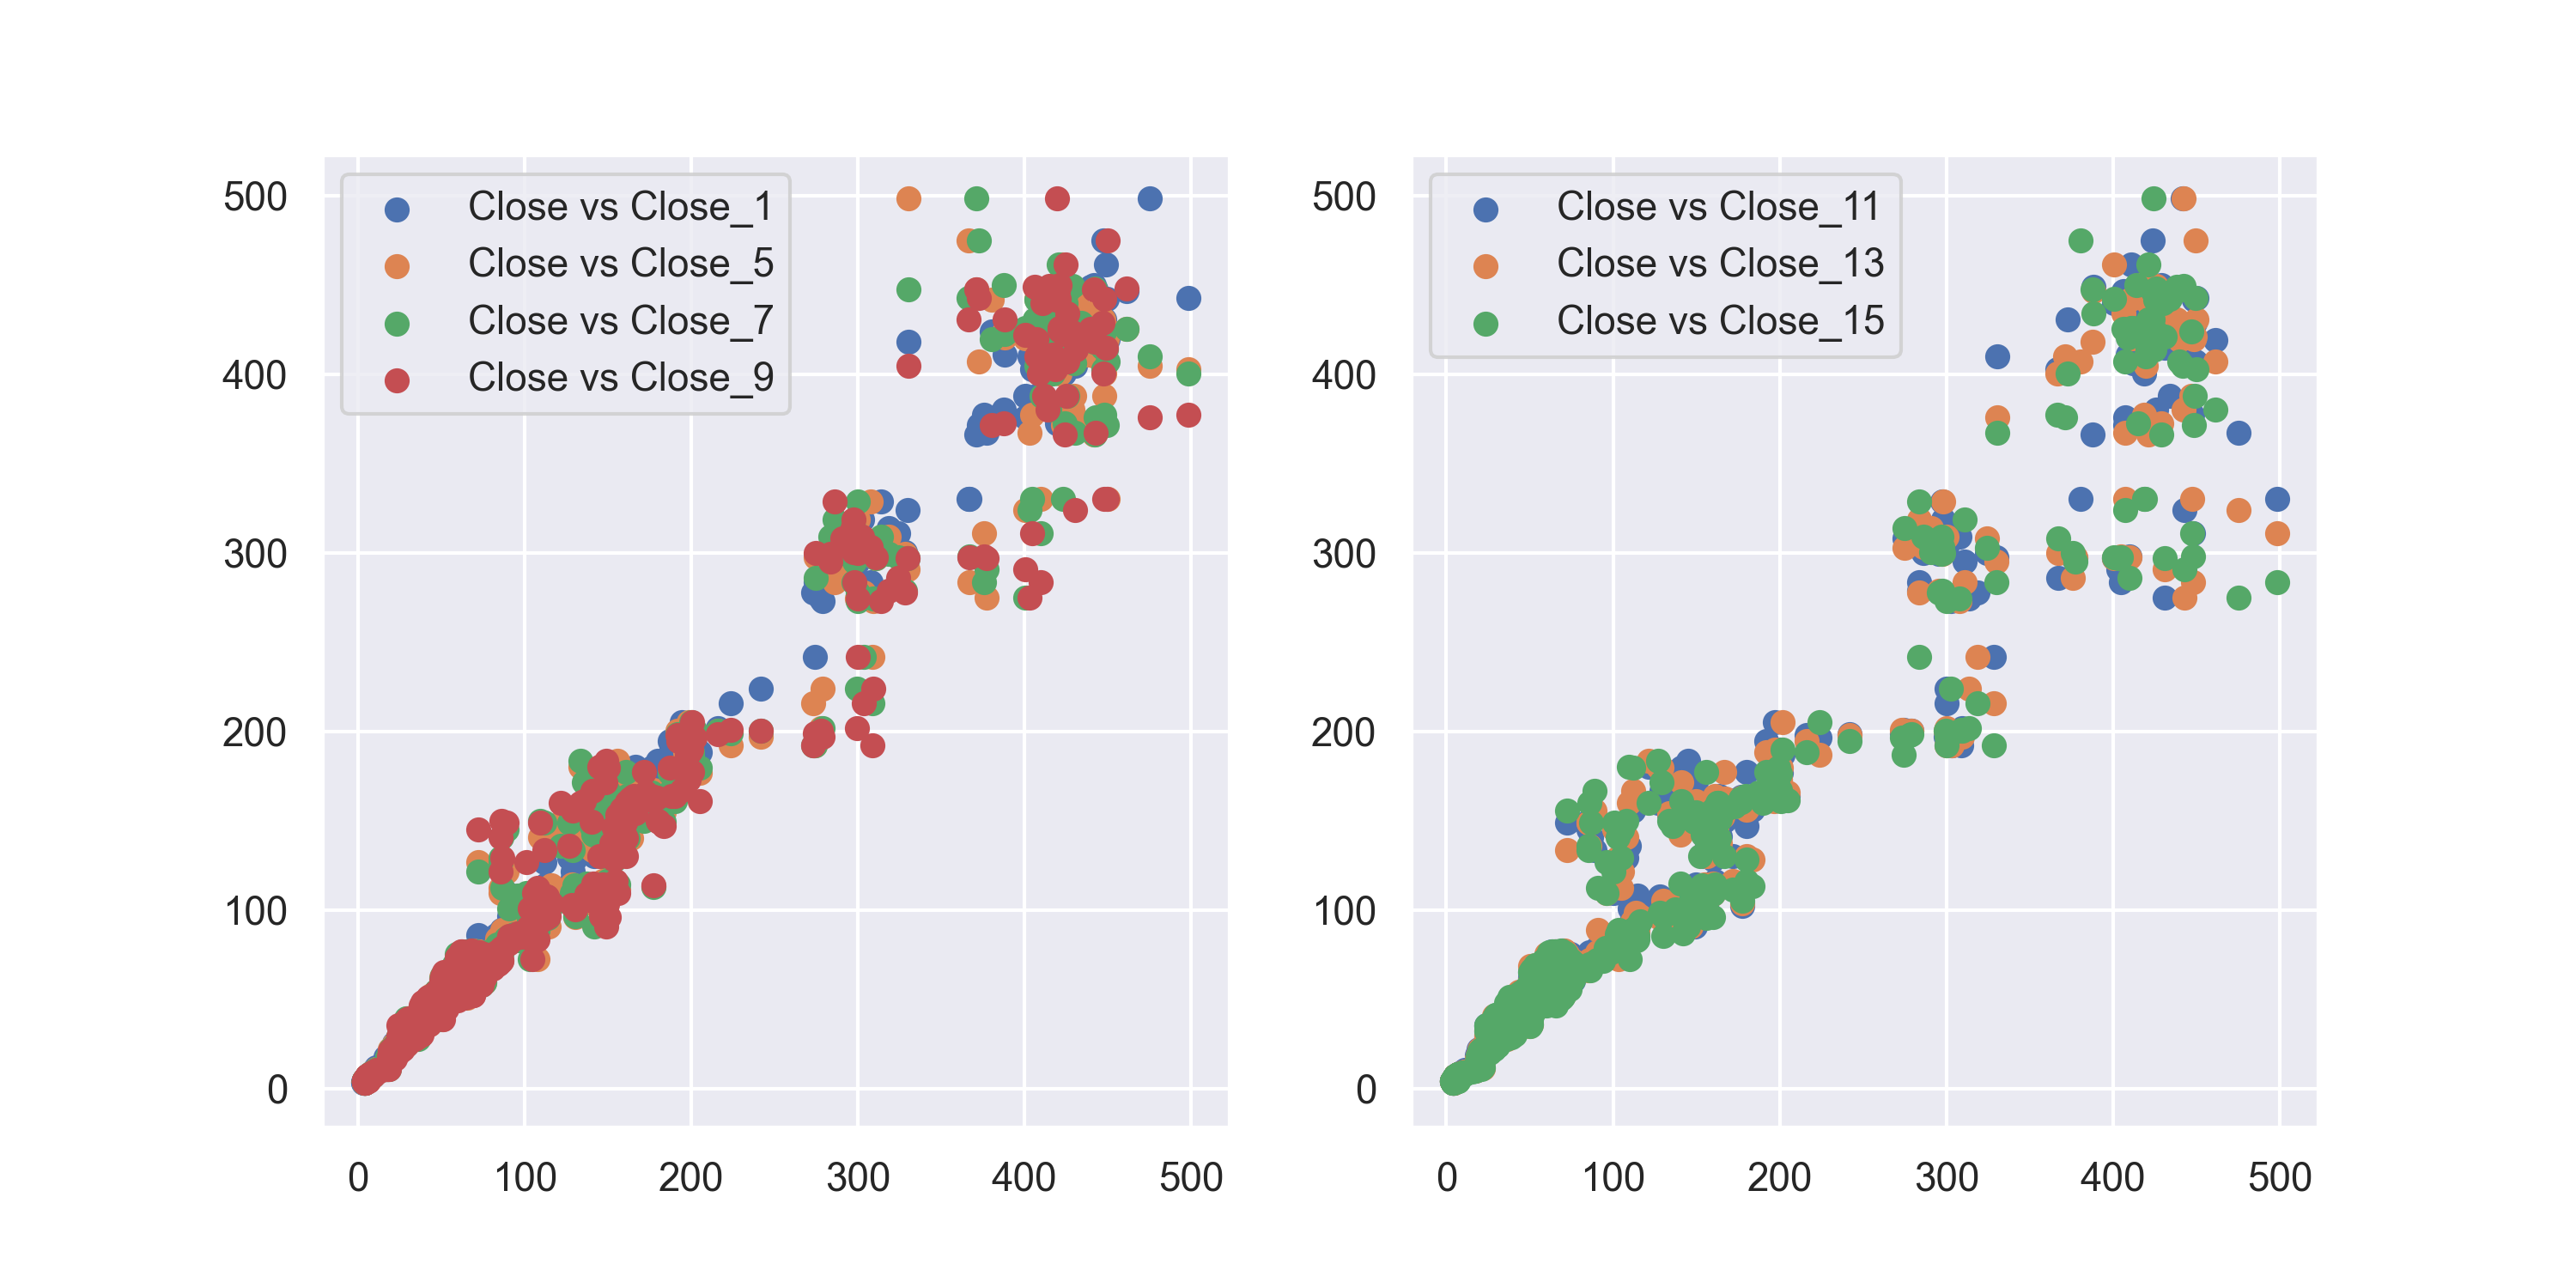

In [110]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_1'],label='Close vs Close_1')
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_5'],label='Close vs Close_5')
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_7'],label='Close vs Close_7')
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_9'],label='Close vs Close_9')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_11'],label='Close vs Close_11')
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_13'],label='Close vs Close_13')
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_15'],label='Close vs Close_15')
plt.legend()
plt.show()
plt.savefig(fname="x1.png")

<IPython.core.display.Javascript object>


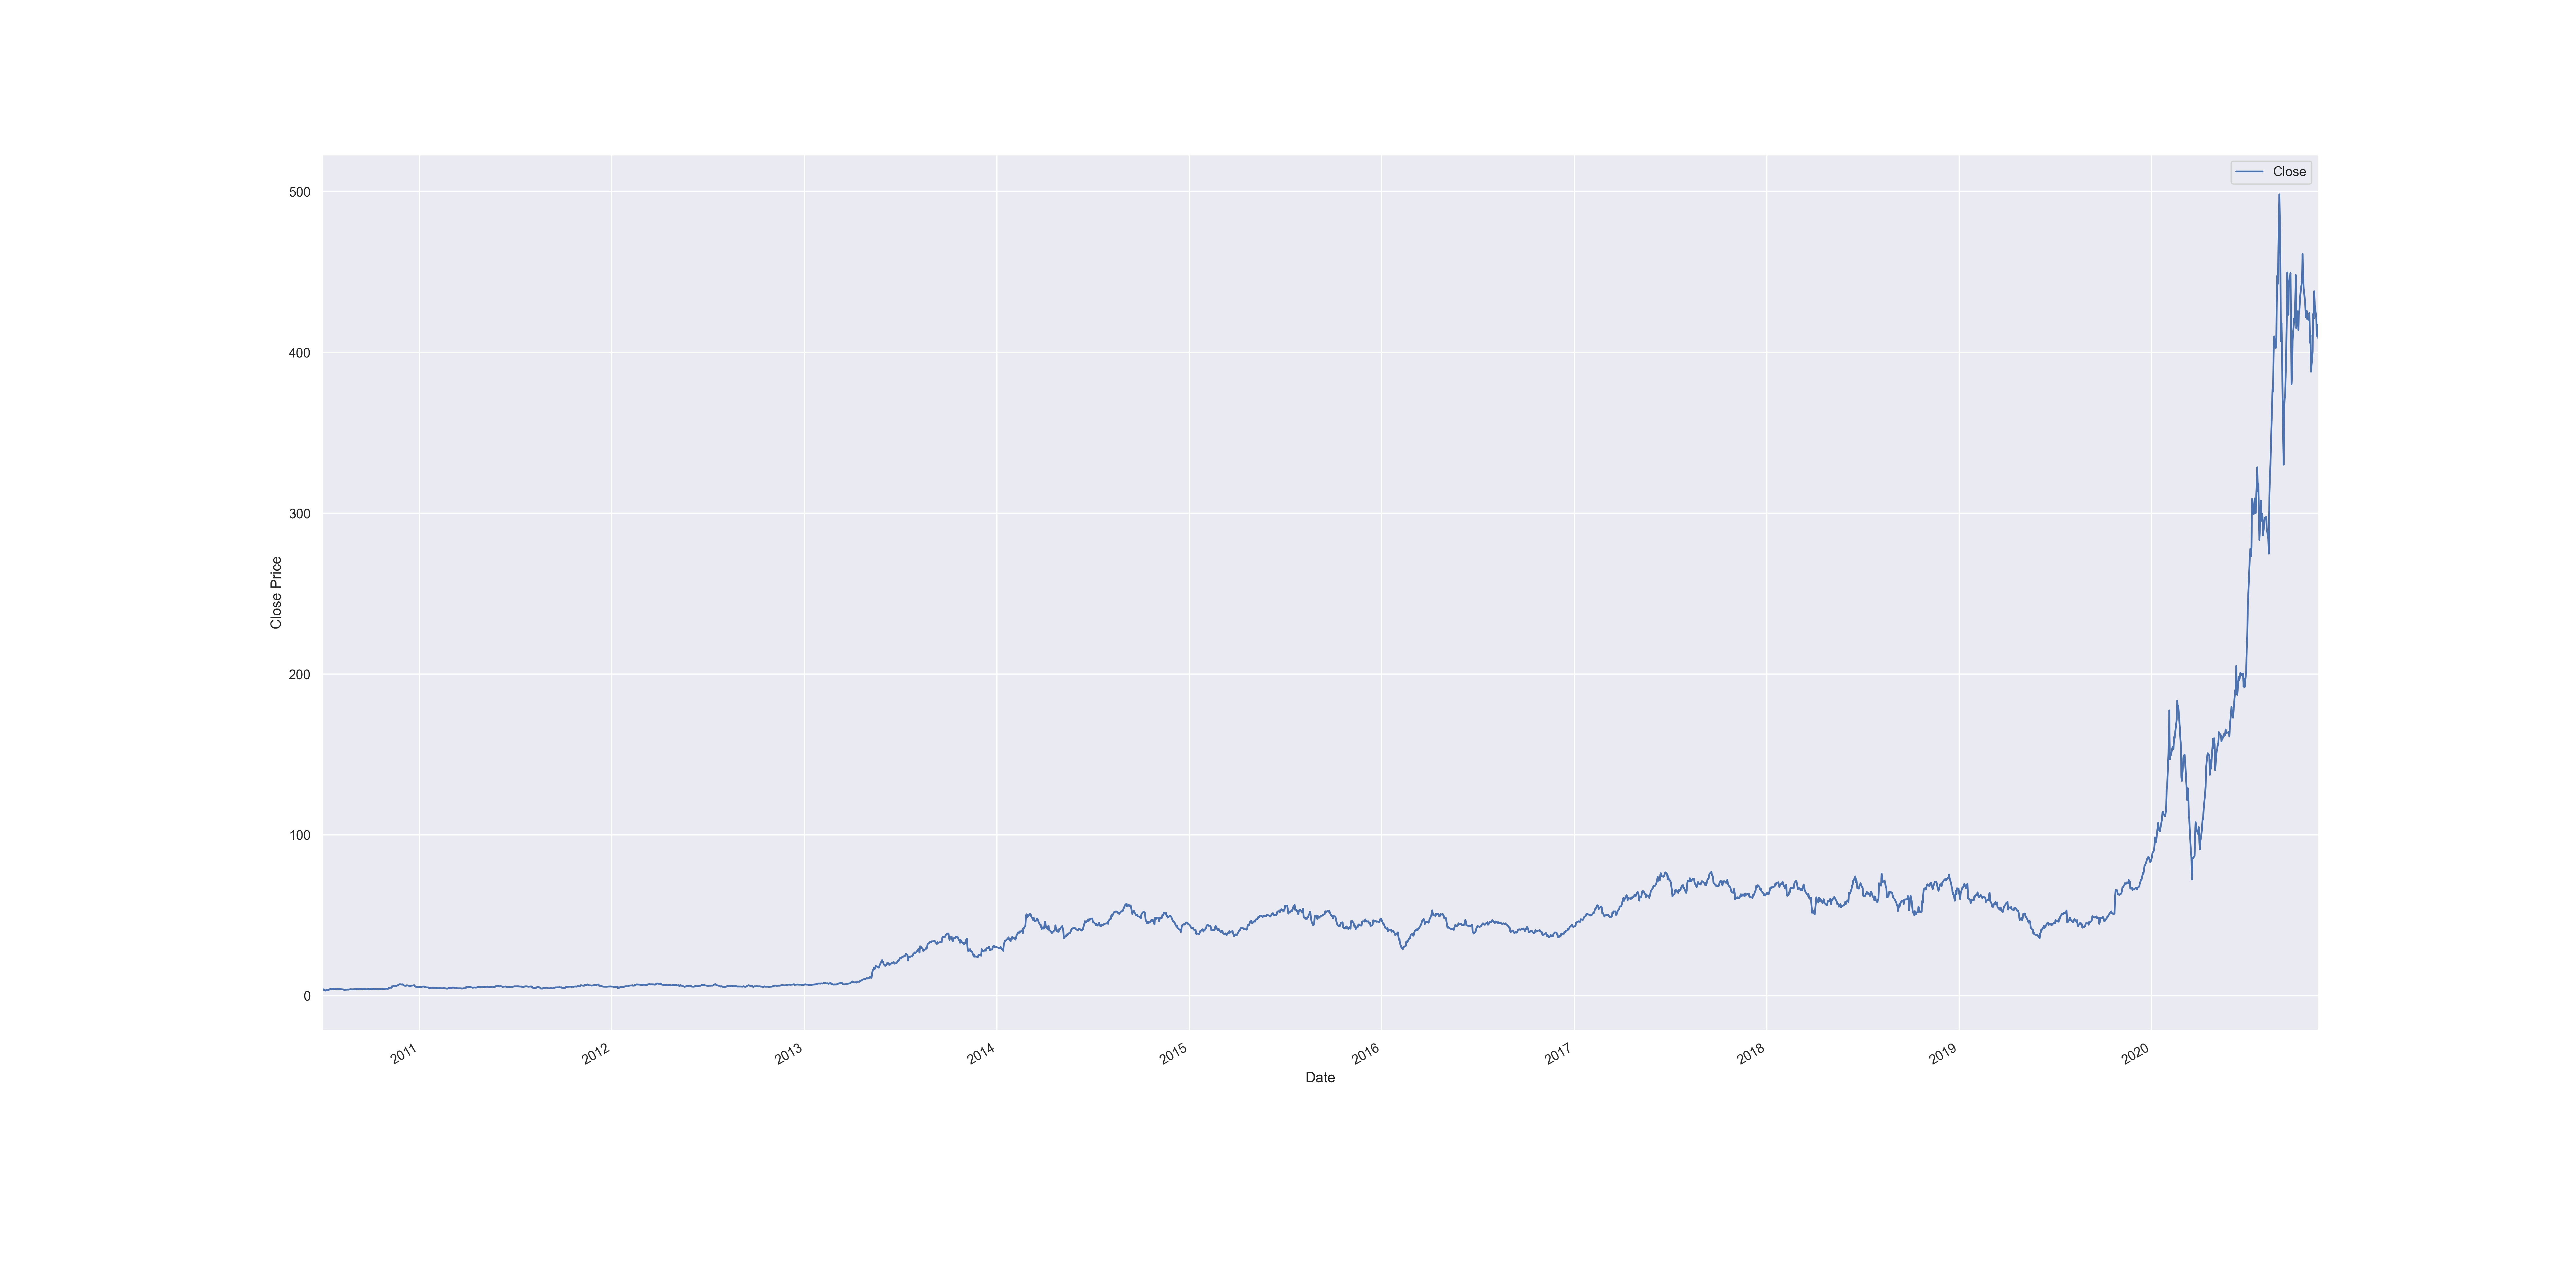

In [81]:
fig, ax = plt.subplots(figsize=(30,15))
df_crosscorrelated.plot(x='Date',y='Close',ax=ax)
plt.ylabel("Close Price")
plt.show()
plt.savefig(fname="closeonly.png")

<IPython.core.display.Javascript object>


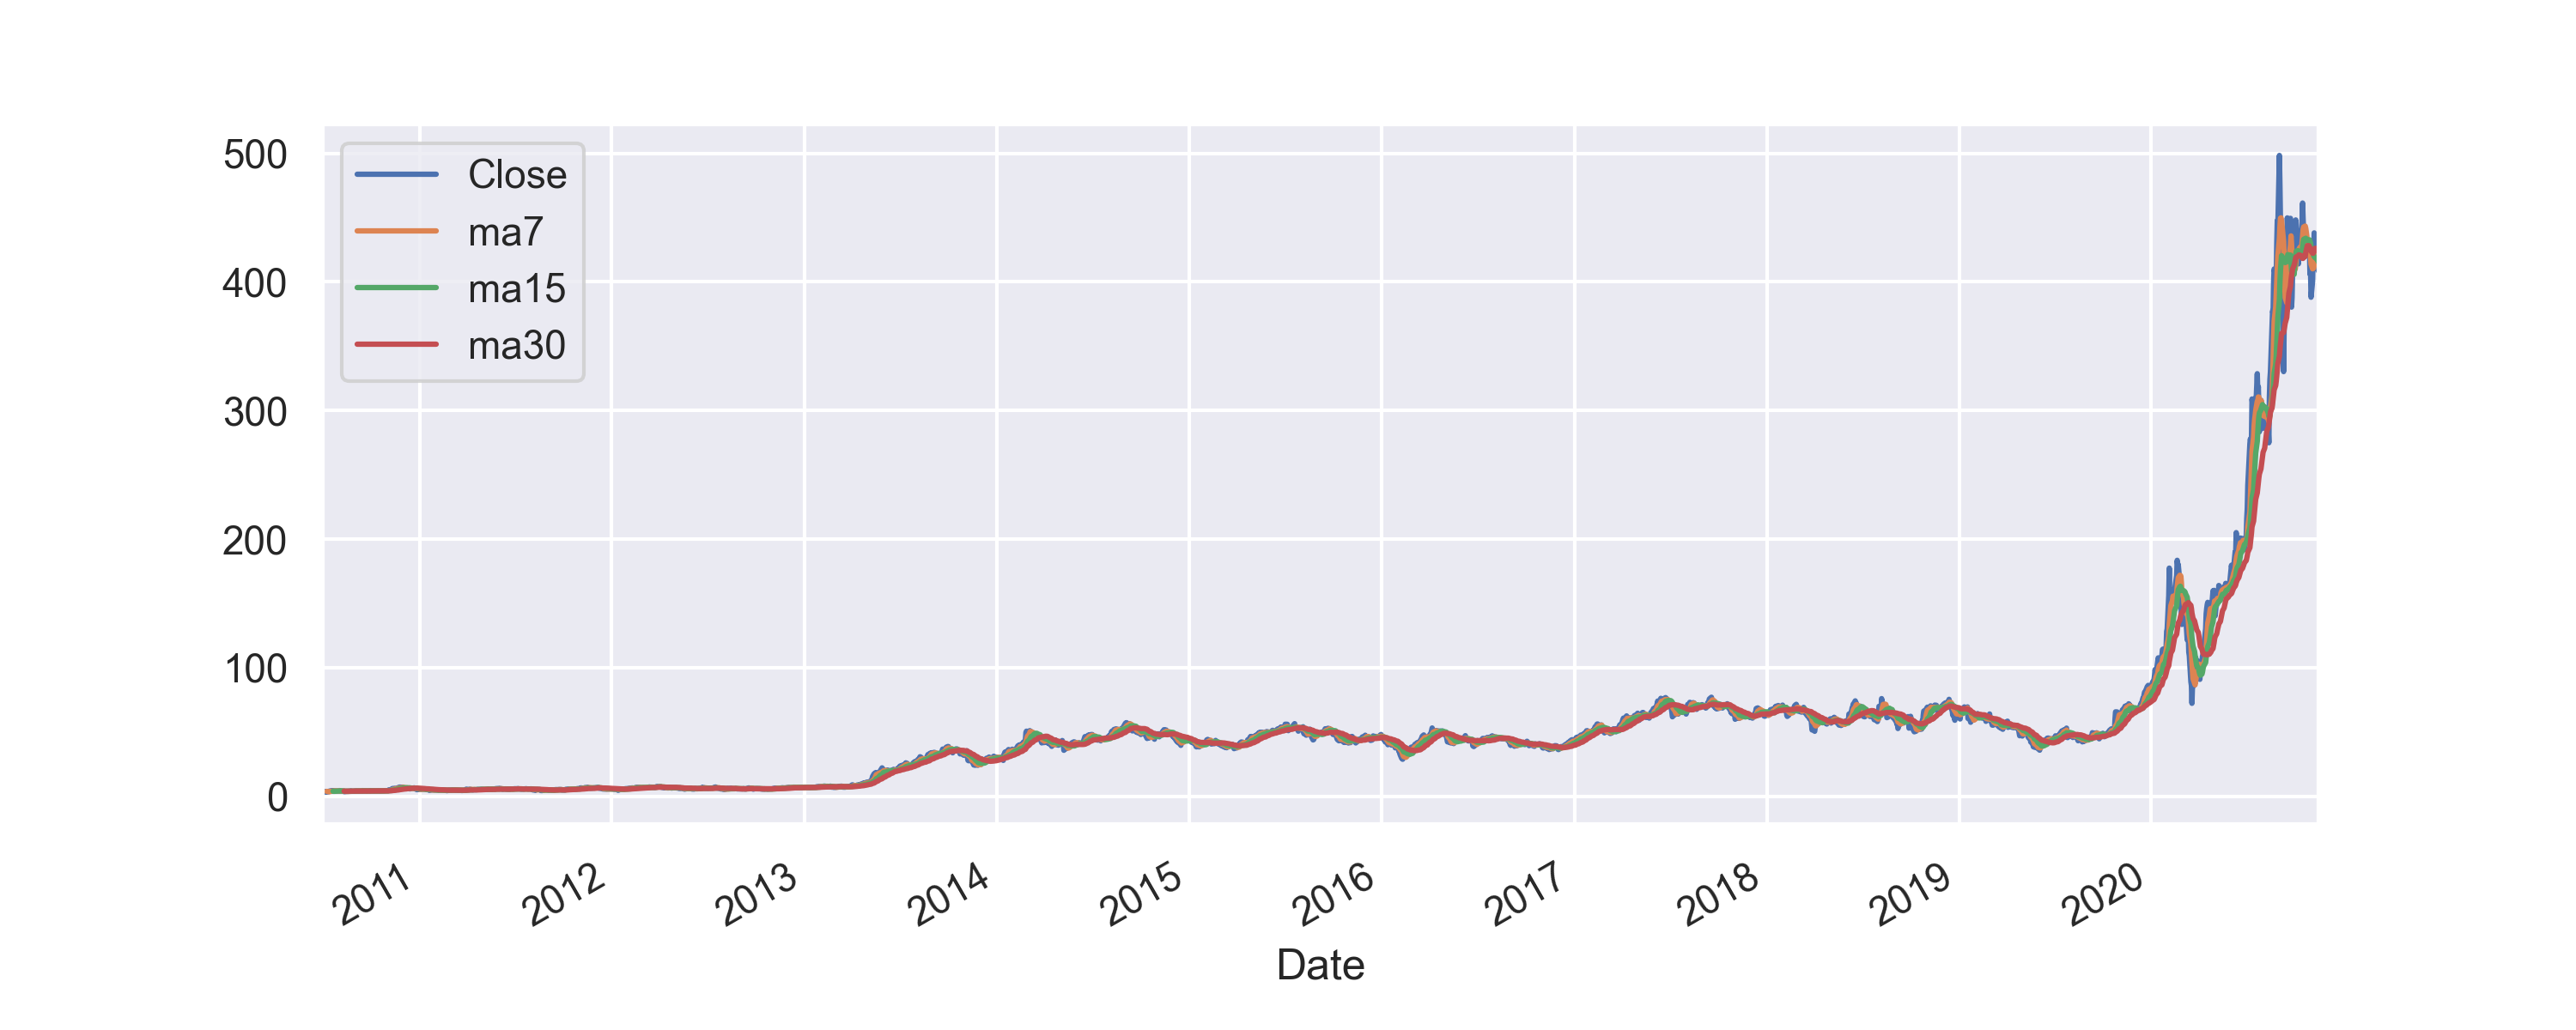

In [82]:
df_crosscorrelated['ma7'] = df_crosscorrelated['Close'].rolling(7).mean()
df_crosscorrelated['ma15'] = df_crosscorrelated['Close'].rolling(15).mean()
df_crosscorrelated['ma30'] = df_crosscorrelated['Close'].rolling(30).mean()
fig, ax = plt.subplots(figsize=(10,4))
df_crosscorrelated.plot(x='Date',y=['Close','ma7','ma15','ma30'],ax=ax)
plt.show()
plt.savefig(fname="x2.png")

<IPython.core.display.Javascript object>


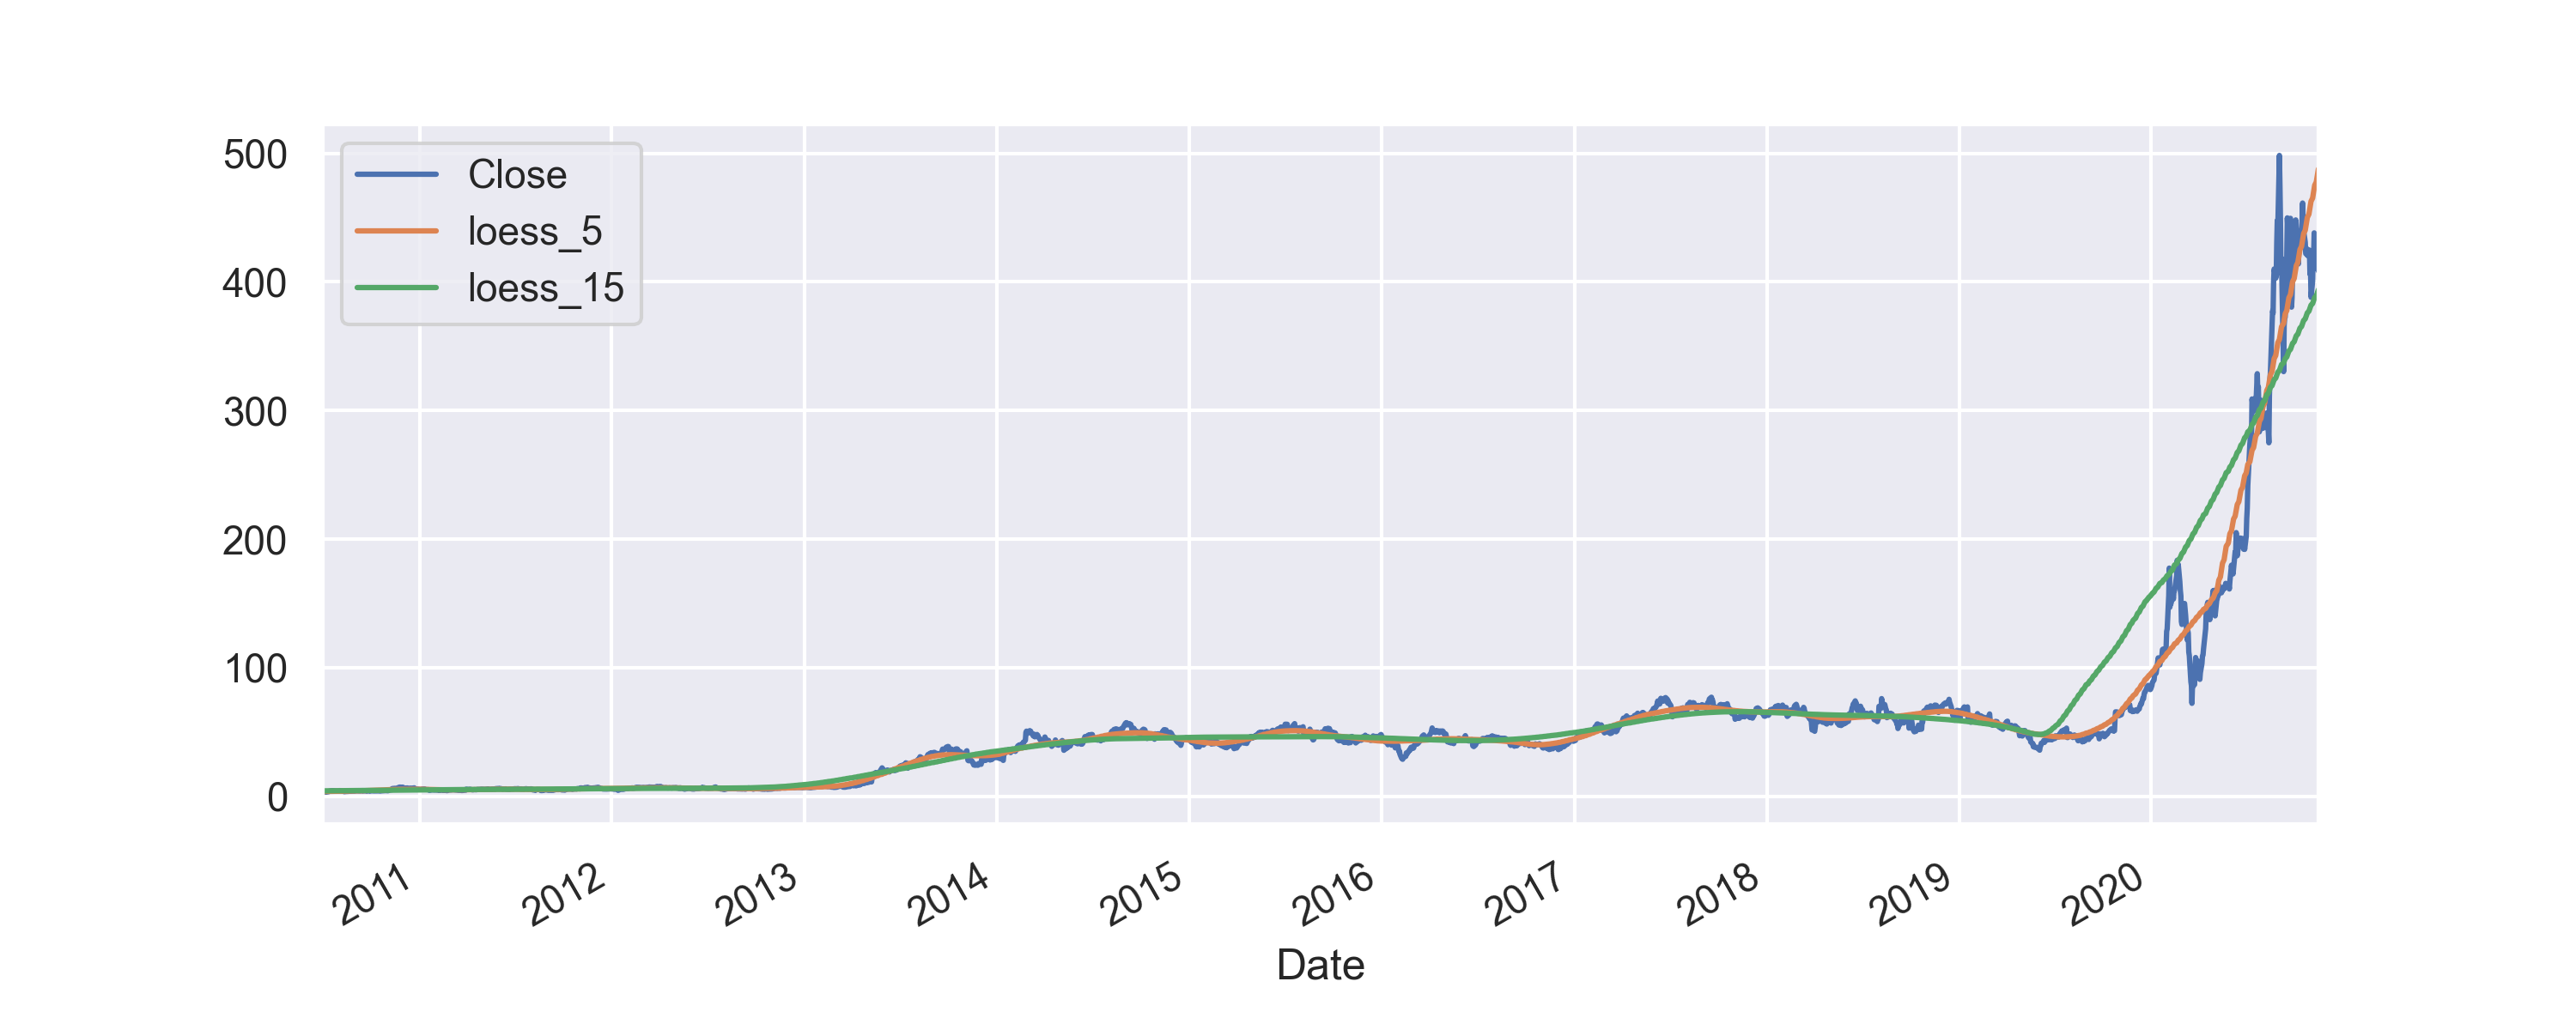

In [85]:
#  Loess Smoothing (5% and 15%)
from statsmodels.nonparametric.smoothers_lowess import lowess
df_crosscorrelated['loess_5'] = lowess(df_crosscorrelated['Close'], np.arange(len(df_crosscorrelated['Close'])), frac=0.05)[:, 1]
df_crosscorrelated['loess_15'] = lowess(df_crosscorrelated['Close'], np.arange(len(df_crosscorrelated['Close'])), frac=0.15)[:, 1]

fig, ax = plt.subplots(figsize=(10,4))
df_crosscorrelated.plot(x='Date',y=['Close','loess_5','loess_15'],ax=ax)
plt.show()
plt.savefig(fname="x3.png")

<IPython.core.display.Javascript object>


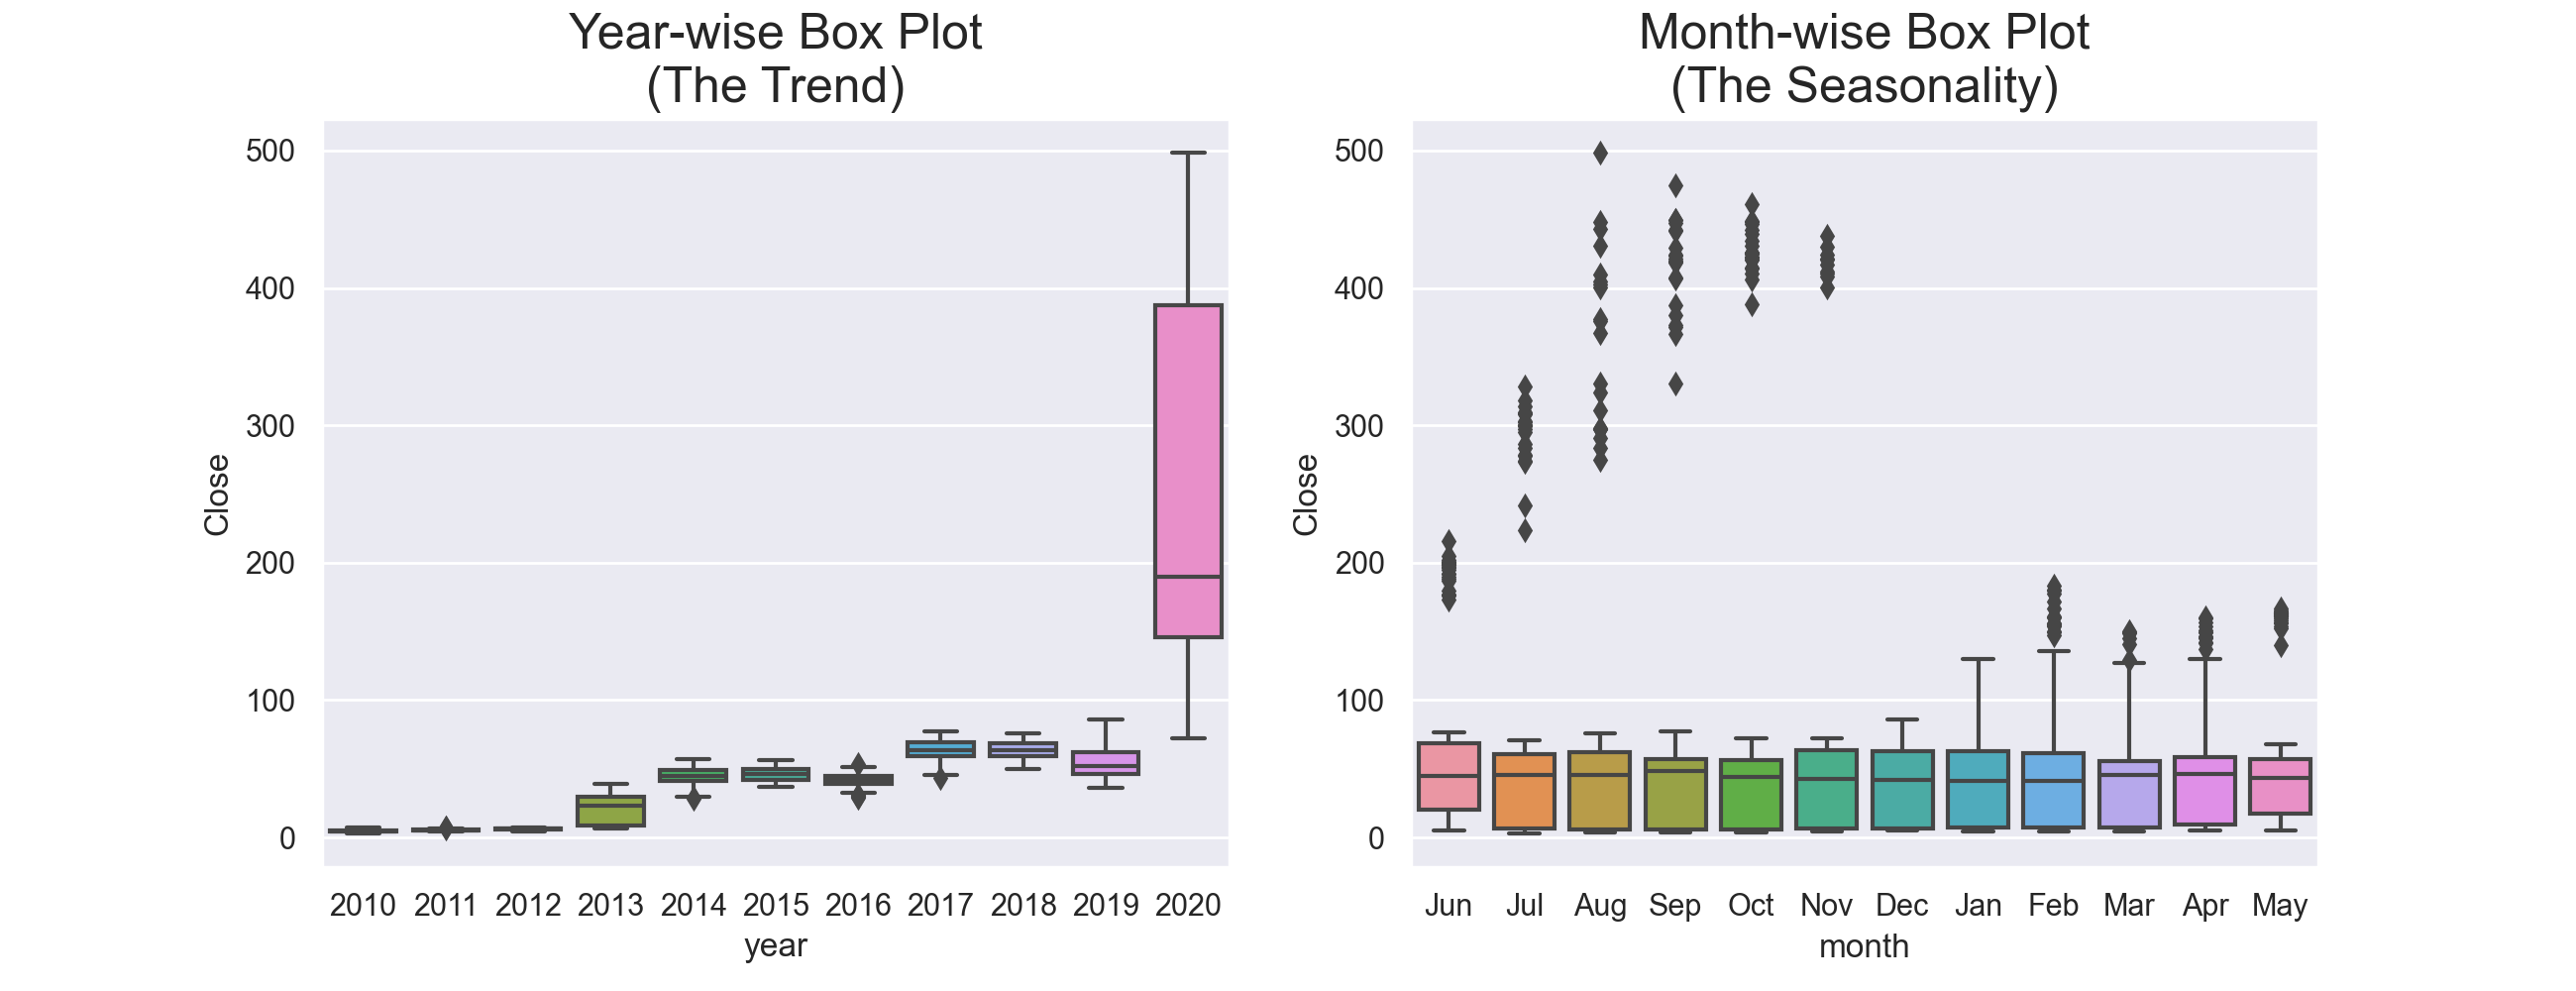

In [90]:
df = df_crosscorrelated
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(13,5), dpi= 100)
sns.boxplot(x='year', y='Close', data=df, ax=axes[0])
sns.boxplot(x='month', y='Close', data=df)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()
plt.savefig(fname="x4.png")

<IPython.core.display.Javascript object>


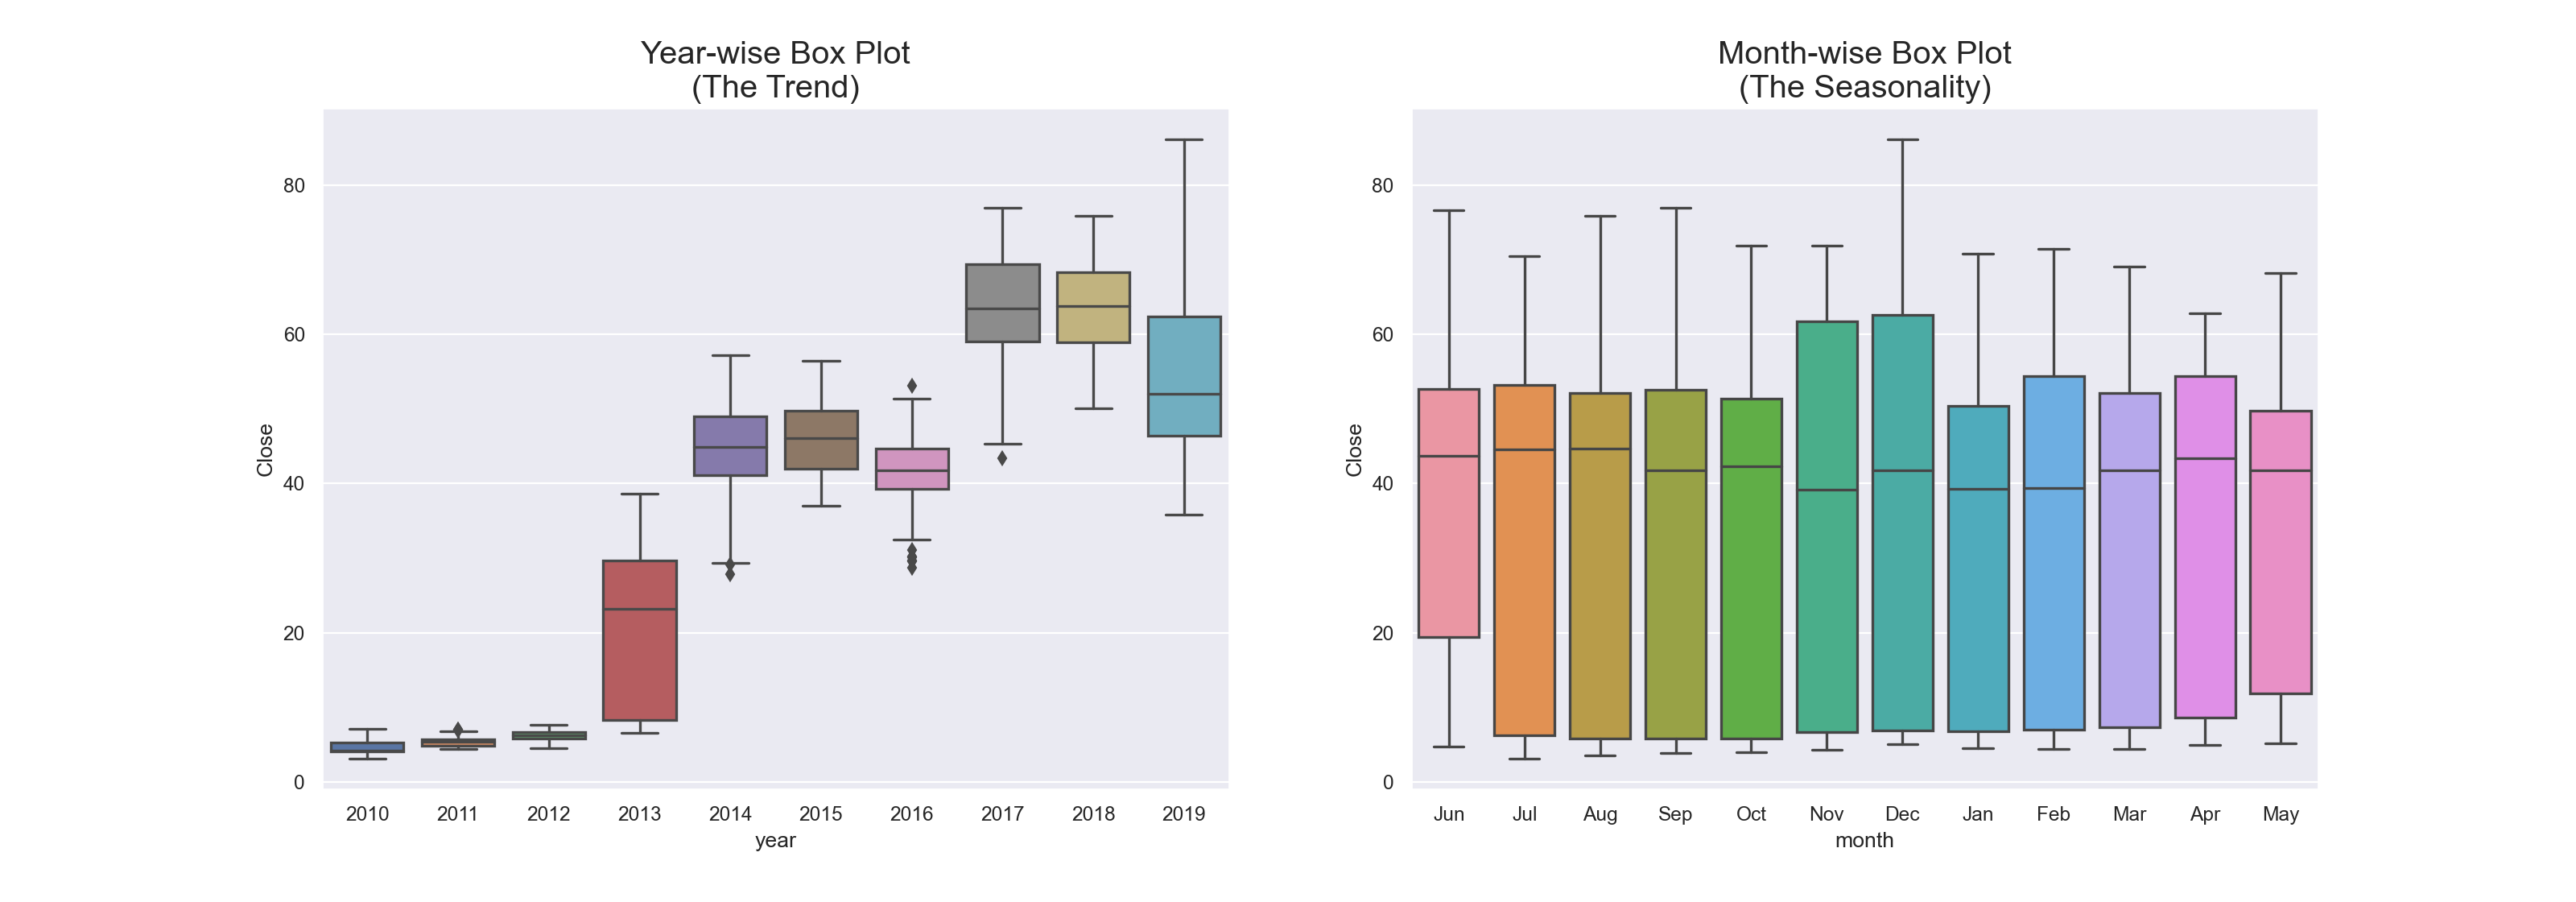

In [108]:
no_2020 = pd.read_csv('../Dataset/without_2020.csv', parse_dates=['Date'])

no_2020['year'] = [d.year for d in no_2020.Date]
no_2020['month'] = [d.strftime('%b') for d in no_2020.Date]
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Close', data=no_2020, ax=axes[0])
sns.boxplot(x='month', y='Close', data=no_2020)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)

plt.show()
plt.savefig(fname="x5.png")

<IPython.core.display.Javascript object>


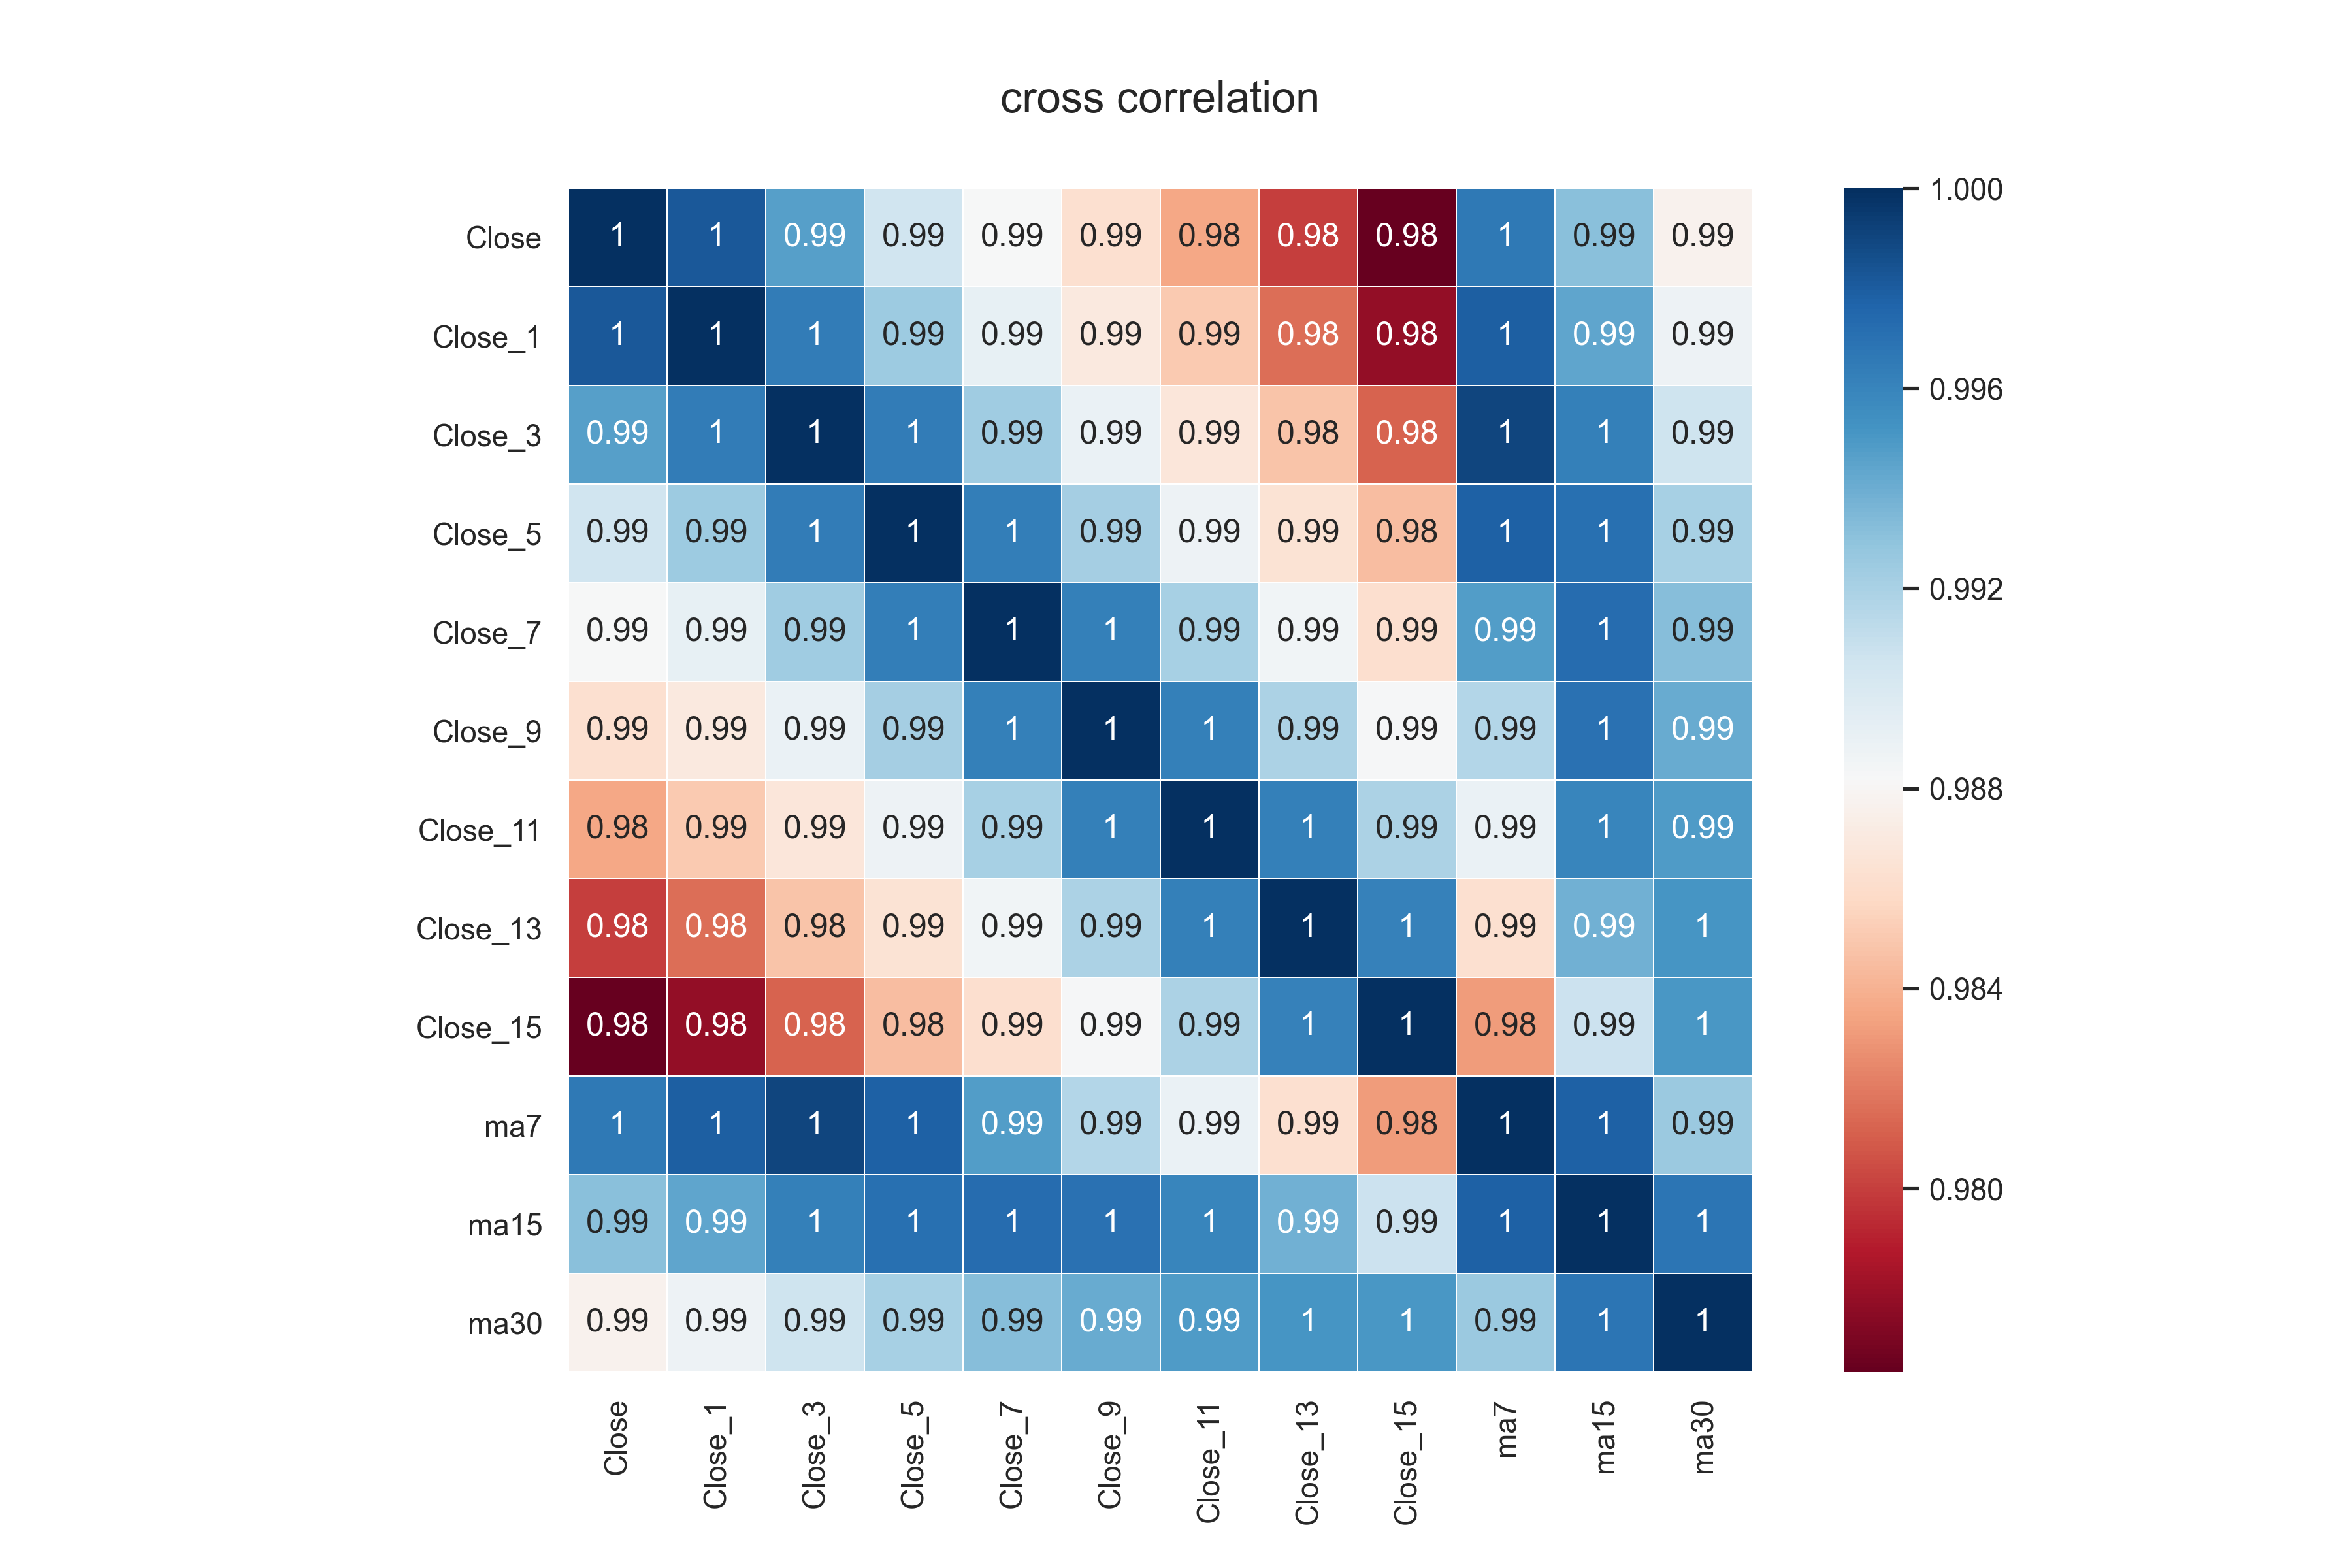

In [63]:
colormap = plt.cm.RdBu
plt.figure(figsize=(12, 8))
ax=plt.subplot(111)
plt.title('cross correlation', y=1.05, size=16)
selected_column = ['Close','Close_1','Close_3','Close_5','Close_7','Close_9', 'Close_11', 'Close_13', 'Close_15' ,'ma7','ma15','ma30']

sns.heatmap(df_crosscorrelated[selected_column].corr(), ax=ax, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()
plt.savefig('correlation.png')

<IPython.core.display.Javascript object>


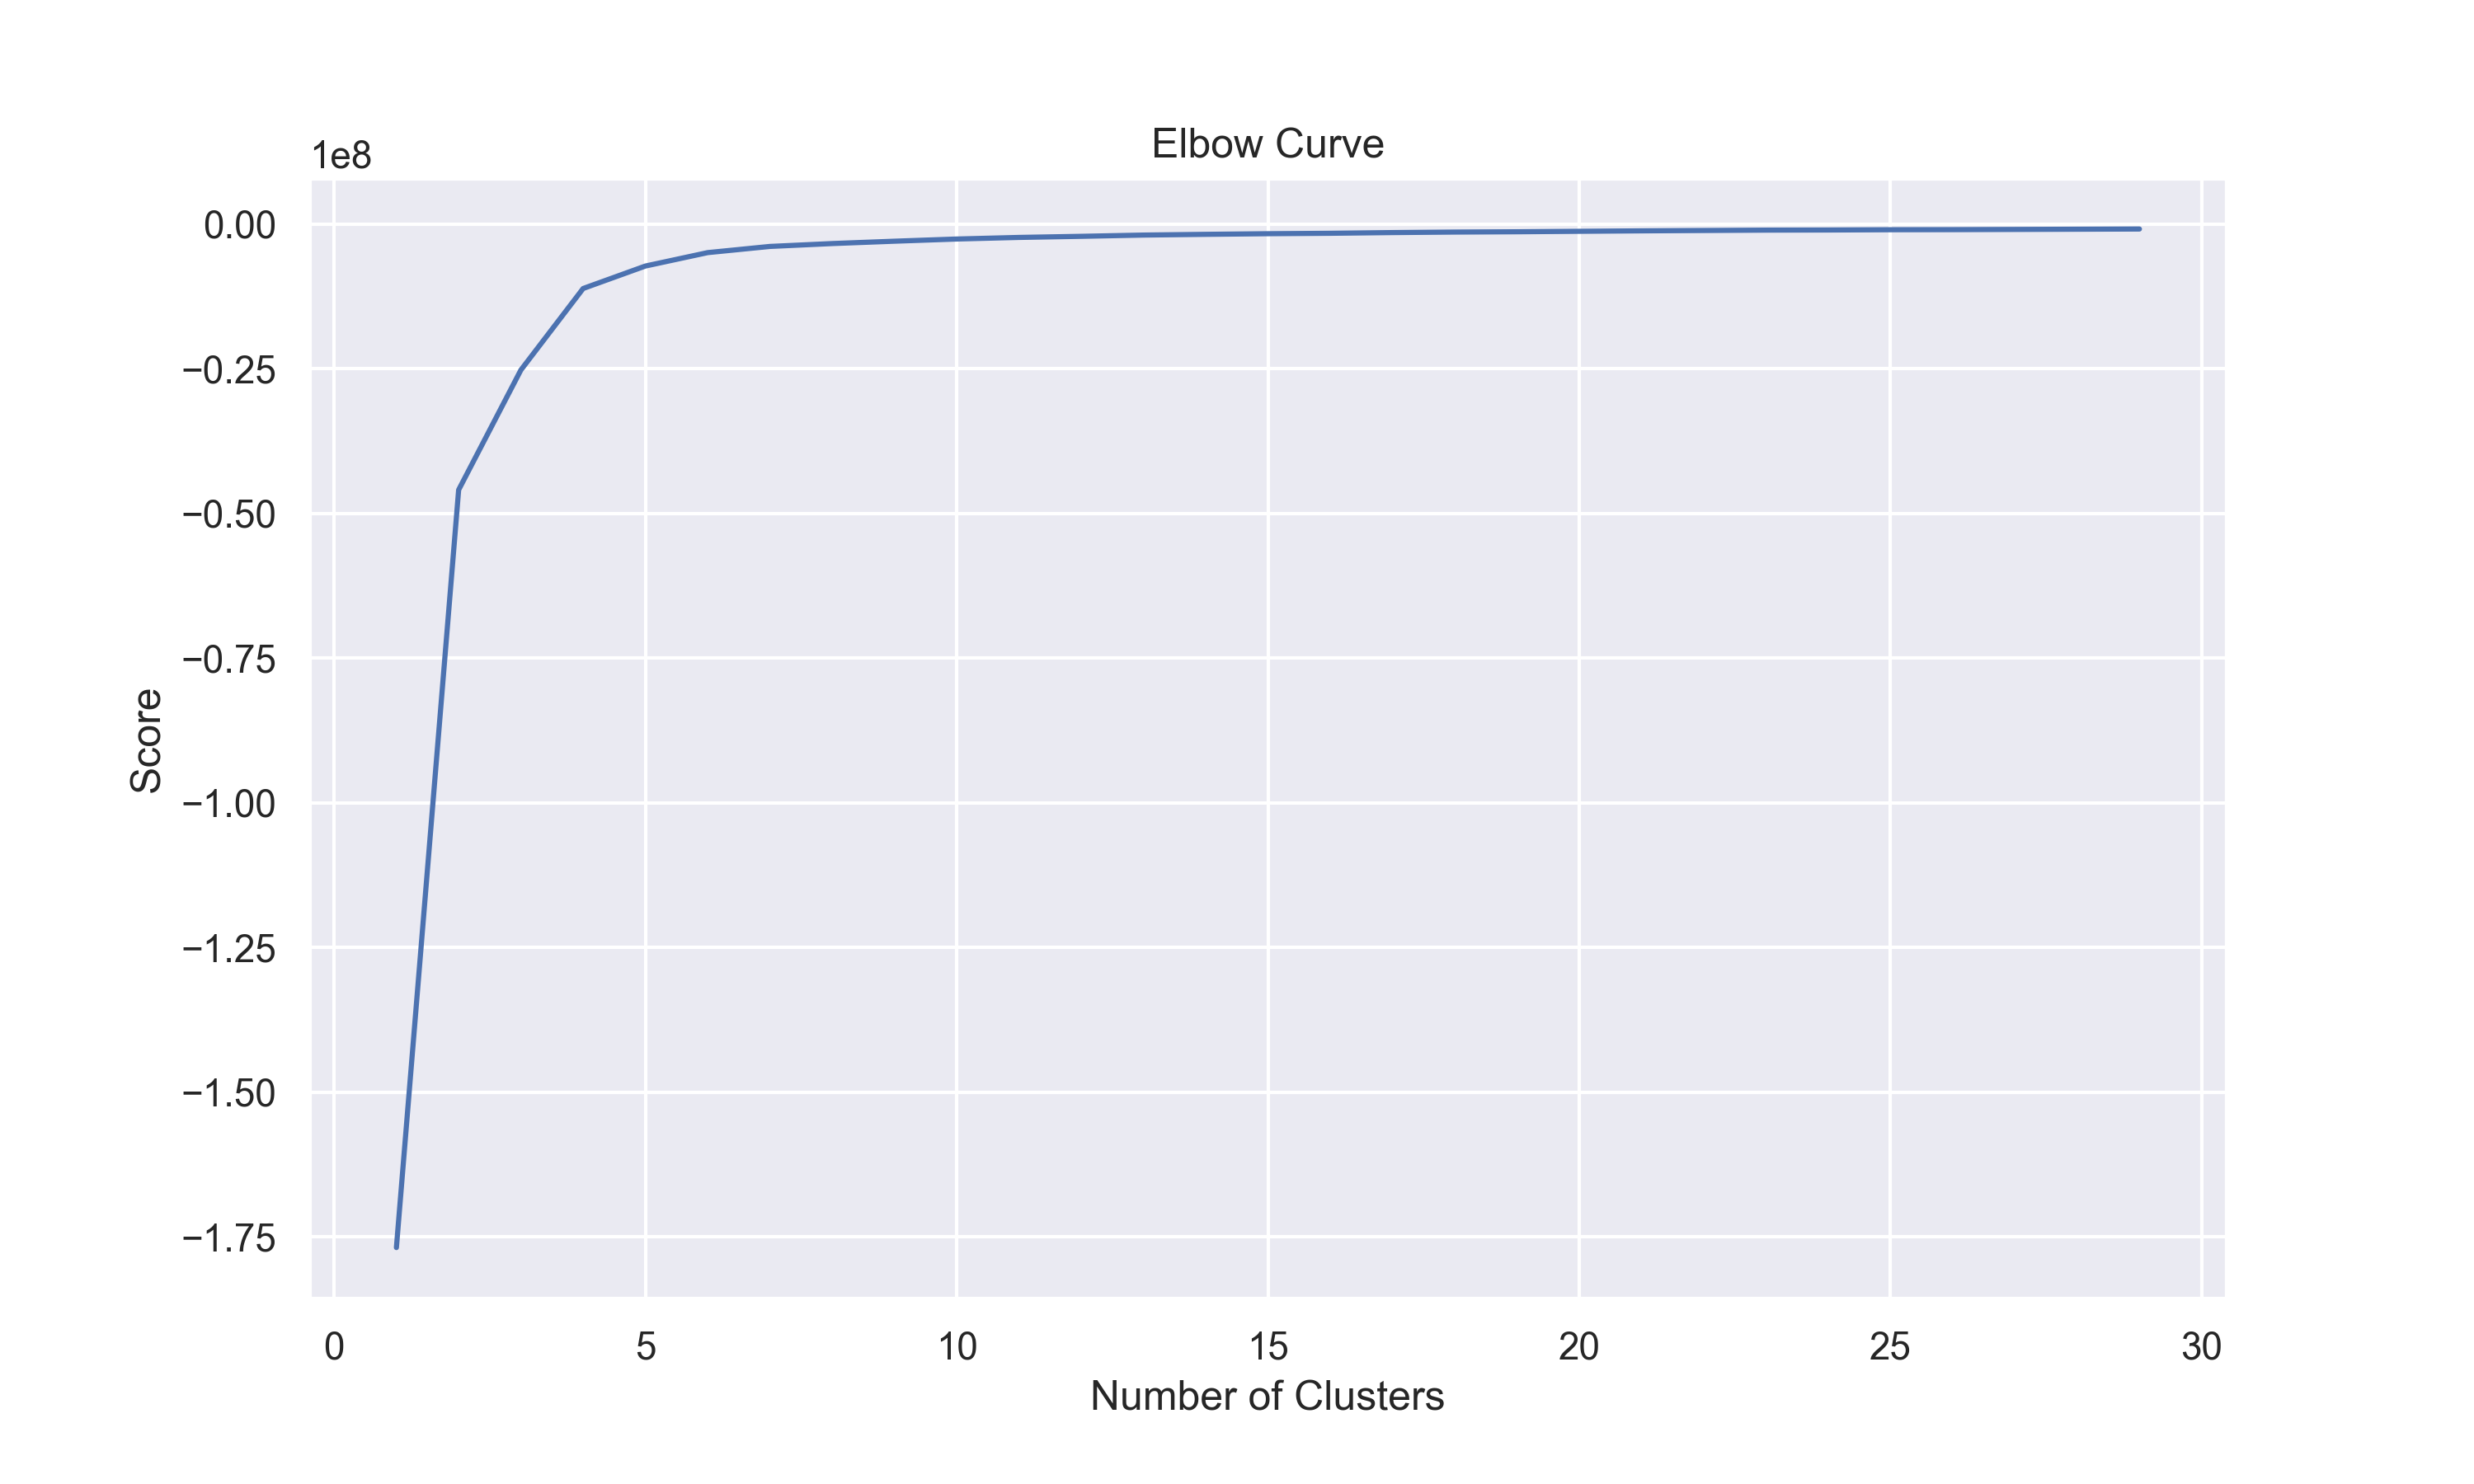

In [99]:
from sklearn.cluster import KMeans

n_cluster = range(1, 30)
# data = df_crosscorrelated.iloc[:,1:].dropna().values
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
plt.savefig(fname="x6.png")

In [102]:
X = df_crosscorrelated.iloc[:,1:-2].dropna().values
X_std = StandardScaler().fit_transform(X)
data = pd.DataFrame(X_std)
pca = PCA(n_components=2)
data = pca.fit_transform(data)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)

In [104]:
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = data[i]
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

outliers_fraction = 0.1
distance = getDistanceByPoint(np_scaled, kmeans)
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
df['anomaly1'] = (distance >= threshold).astype(int)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


<IPython.core.display.Javascript object>


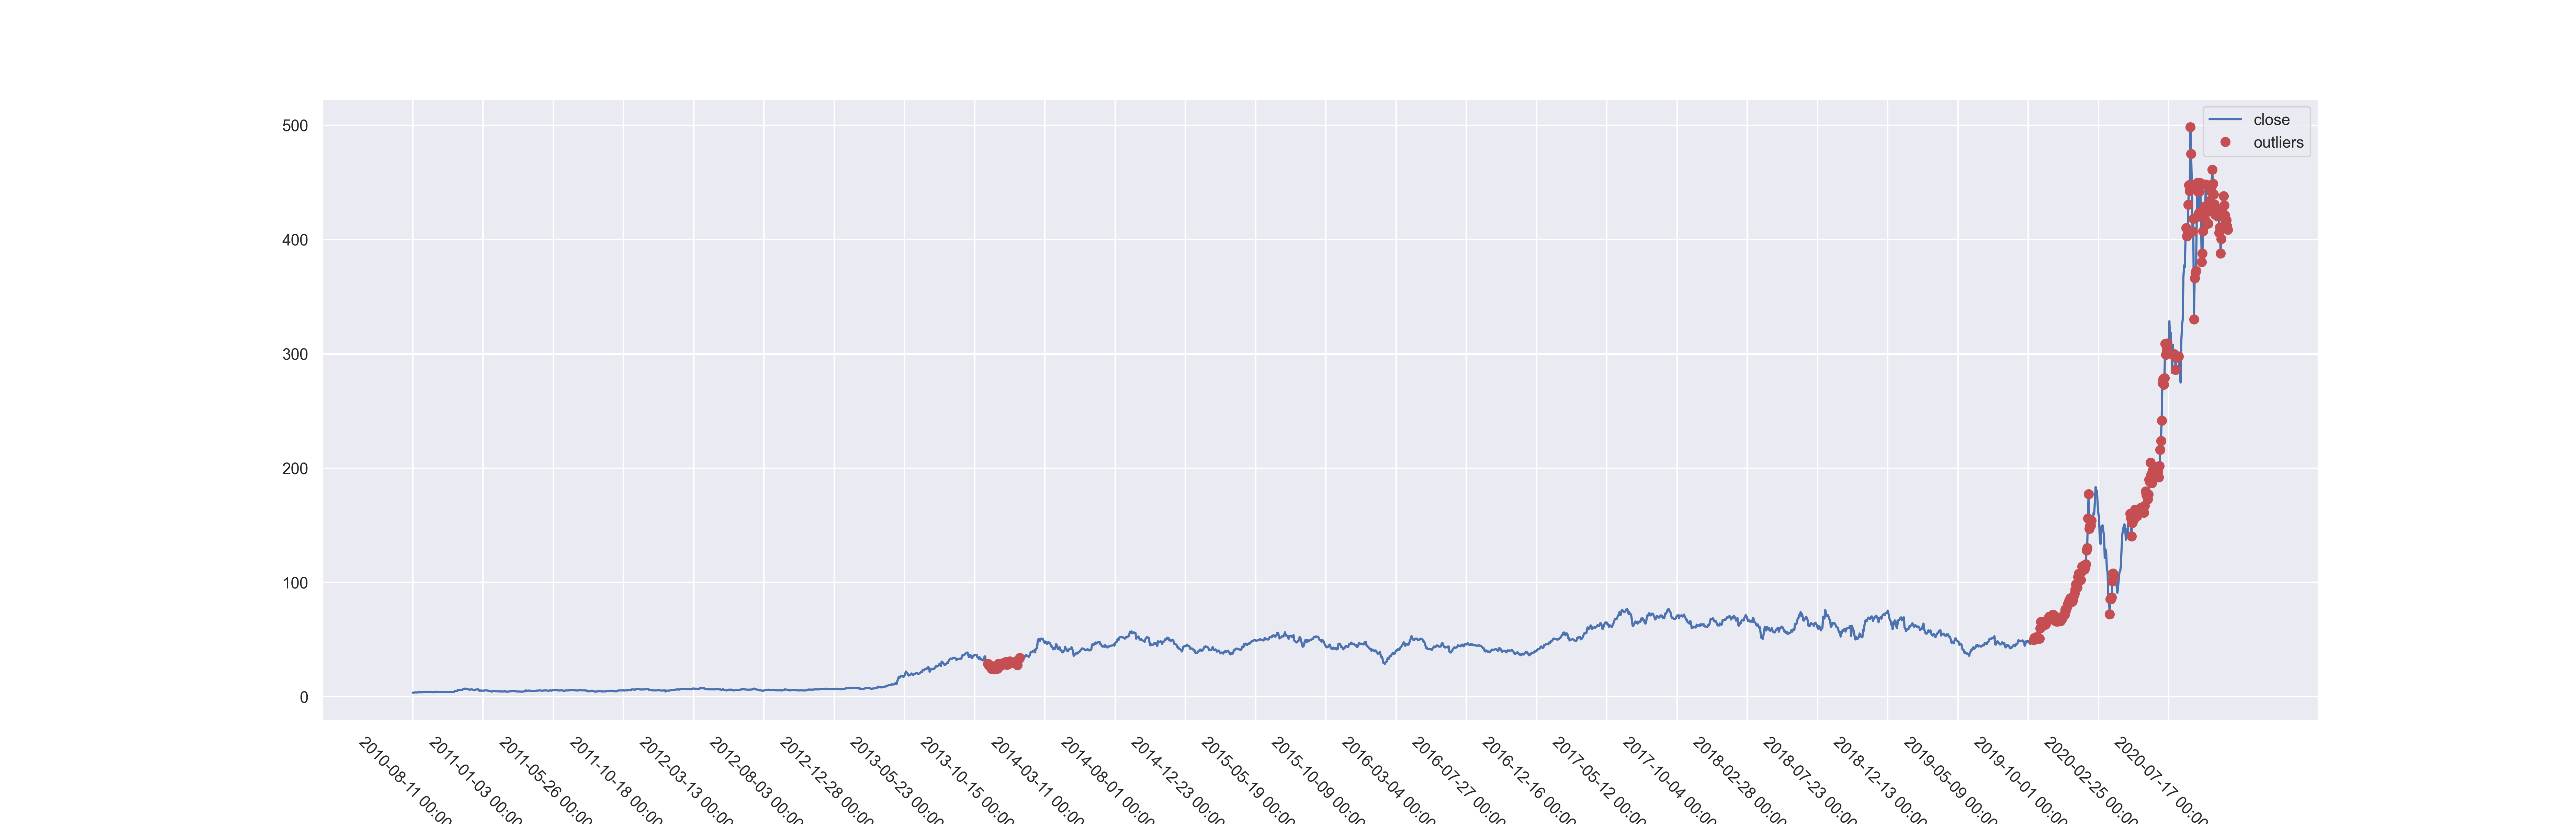

In [107]:
plt.figure(figsize=(25, 8))
plt.plot(df['Close'], label='close',c='b')
plt.plot(df['Close'], 'o', label='outliers',markevery=df.loc[df['anomaly1'] == 1].index.tolist(),c='r')
plt.xticks(np.arange(df.shape[0])[::100],df['Date'][::100],rotation='-45')
plt.legend()
plt.show()
plt.savefig(fname="dis1.png")